<h1 align='center'> COMP2420/COMP6420 - Introduction to Data Management,<br/> Analysis and Security</h1>

<h1 align='center'> Assignment - 2</h1>

-----
<br/>

## Grading

|**Maximum Marks**         |  **100**
|--------------------------|--------
|  **Weight**              |  **20% of the Total Course Grade**
|  **Submission deadline** |  **7:00PM, Friday, May 24**
|  **Submission mode**     |  **Electronic, Using GitLab <br/> One submission per group**
|  **Estimated time**      |  **20 hours**
|  **Penalty**             |  **100% after the deadline**
  


## Submission

You need to submit the notebook `Assignment-2.ipynb` and any other additional files that you may have created / hyperlinked in this notebook, as part of your submission by pushing it to your forked GitLab repository. You need to add your group details below. Make sure your group works on and submits only one fork of the assignment repository. 


### Note:

* It is strongly advised to read the whole assignment before attempting it and have at least a cursory glance at the dataset in order to gauge the requirements and understand what you need to do as a bigger picture.

* For answers requiring free form written text, use the designated cells denoted by `YOUR ANSWER HERE` -- double click on the cell to write inside them.

* For all coding questions please write your code after the comment `YOUR CODE HERE`.

* In the process of testing your code, you can insert more cells or use print statements for debugging, but when submitting your file remember to remove these cells and calls respectively.

* With respect to any code that you submit, you will be marked on the **correctness** and **readability** of your code. If your marker can't understand your code, your marks may be deducted.

<span style="color:blue">
    
### Group Number :  061

### Student IDs: u6871331, u6894190 and u5846163

</span>

## Introductiongenres



In [2]:
# IMPORTING FREQUENTLY USED PYTHON MODULES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import psycopg2
import os
plt.style.use('seaborn-notebook')
%matplotlib inline

# JUST TO MAKE SURE SOME WARNINGS ARE IGNORED 
import warnings
warnings.filterwarnings("ignore")

In [3]:
# IMPORT ANY OTHER REQUIRED MODULES IN THIS CELL





## Section A - Database Management (15 Marks)

You have been given the following database containing 15 tables relating to **DVD Movie Rentals**. The data contained in these tables is as follows -

|  **Table**               |  **Data Description**      |
|--------------------------|----------------------------|
|  **actor**                   |  actors data including first name and last name     |
|  **film**                    |  films data such as title, release year, length, rating, etc      |
|  film_actor              |  stores the relationships between films and actors |
|  **category**                |  stores film’s categories data |
|  film_category           |  stores the relationships between films and categories | 
|  **store**                  |  store data including manager staff and address |
|  **inventory**               |  stores inventory data |
|  **rental**                  |  stores rental data |
|  **payment**                 |  stores customer's payments |
|  **staff**                   |  stores staff data |
|  **customer**                |  stores customer data |
|  **address**                 |  address data for staff and customers |
|  **city**                    |  stores city data |
|  **country**                 |  stores country data |

Visualizing the relations between these tables can be aided by looking at the below **E-R Diagram**.

<img src='./dvd_rental_er.png'>

Based on your understanding of the relationships between these tables, answer the following questions by writing SQL queries to get the required data rows from the database and display them as a **Pandas dataframe**. 

***
#### **NOTE**:
For the following questions, in the CSIT labs you will be able to connect directly to the database using the below code within the notebook. From outside of the CSIT labs, you will need to perform SQL queries in your terminal by using [partch](https://cs.anu.edu.au/docs/student-computing-environment/linuxlabs/remoteaccess/#connectingtopartch3). Once you have the correct query, you may just fill in the boxes below.

**Partch Instructions**
1. Connect to partch as per the above hyperlink
2. In your terminal, enter `psql` to access the sql database
3. Enter `\c dvdrental` to ensure you are accessing the assignment database (or simply specify dvdrental when connecting to the database server -- `psql dvdrental`).
4. (Sanity Check) Enter `SELECT * FROM actor;` . If you receive the first row to be "Penelope Guiness", you should be good to go !
***

In [4]:
# Connect using psycopg2
conn = psycopg2.connect(host="/var/run/postgresql", database="dvdrental")

# Activate connection cursor
curr = conn.cursor()

In [5]:
def execute_sql(query):
    # Select table and display
    curr.execute(query)

    # Fetches all the rows from the result of the query
    rows = curr.fetchall()
    
    # Gets the column names for the table
    colnames = [desc[0] for desc in curr.description]

    # Converts into readable pandas dataframe
    df_result = pd.DataFrame(rows, columns=colnames)
    return df_resultquery = "SELECT DISTINCT film.rating FROM film "

### 1. Write an SQL query to determine the total sales from the rentals of the film 'Affair Prejudice' from the rental store with `store_id = 2`. Your query should result in a single column called `Total Rental Cost` with the value of the total cost of all these rentals.
<span style= 'float: right;'><b>[3 marks]</b></span>

In [6]:
# YOUR QUERY HERE
query = "SELECT SUM(payment.amount) AS TotalRentalCost FROM payment JOIN rental ON payment.rental_id=rental.rental_id JOIN inventory ON rental.inventory_id=inventory.inventory_id JOIN film ON inventory.film_id = film.film_id WHERE film.film_id = 4 AND inventory.store_id = 2 ;"

execute_sql(query)

,totalrentalcost
0,33.91


### 2. Write an SQL query to retrieve the names of all customers who rented the film ‘Affair Prejudice’ from the store with `store_id = 1`. The result of your query should display each customer's first name and last name. 
<span style= 'float: right;'><b>[3 marks]</b></span>

In [7]:
# YOUR QUERY HERE
query = "SELECT DISTINCT customer.first_name AS firstName, customer.last_name AS lastName FROM customer JOIN rental ON customer.customer_id=rental.customer_id JOIN inventory ON rental.inventory_id = inventory.inventory_id JOIN film ON inventory.film_id=film.film_id WHERE film.film_id=4 AND inventory.store_id=1"
#Justify this by saying you assume customer.store_id is about the registration rather than the rental 
execute_sql(query)

,firstname,lastname
0,Carmen,Owens
1,Danielle,Daniels
2,Eleanor,Hunt
3,Jeff,East
4,Jordan,Archuleta
5,Megan,Palmer
6,Michael,Silverman
7,Minnie,Romero
8,Natalie,Meyer
9,Nina,Soto


### 3. Write an SQL query to retrieve the names of all those customers who have a total of more than 100 dollars in recorded payments. Your query's result should include each customer's first name, last name and customer ID. 
<span style= 'float: right;'><b>[4 marks]</b></span>

In [18]:
# YOUR QUERY HERE
#query = "SELECT customer.first_name AS firstName, customer.last_name AS lastName, customer.customer_id AS customerID FROM customer JOIN rental ON customer.customer_id=rental.customer_id JOIN payment ON rental.rental_id=payment.rental_id GROUP BY customer.first_name, customer.last_name, customer.customer_id HAVING SUM(payment.amount) > 100"
query = "SELECT DISTINCT rating FROM film"
execute_sql(query)

,rating
0,G
1,PG
2,NC-17
3,PG-13
4,R


### 4. Write an SQL query to retrieve the names of all customers who have rented the movie ‘Angels Life’ from *both* stores with `store_id = 1` and `store_id = 2`. Your query's result should include each customer's first name, last name and customer ID.
<span style= 'float: right;'><b>[5 marks]</b></span>

In [9]:
# YOUR QUERY HERE

query = "SELECT inventory.store_id, customer.first_name AS firstName, customer.last_name AS lastName, customer.customer_id AS customerID FROM customer JOIN rental ON customer.customer_id=rental.customer_id JOIN inventory ON rental.inventory_id=inventory.inventory_id JOIN film ON inventory.film_id=film.film_id WHERE film.film_id=25;"

execute_sql(query)

,store_id,firstname,lastname,customerid
0,1,Jennie,Terry,265
1,1,Gilbert,Sledge,497
2,1,Veronica,Stone,158
3,1,Howard,Fortner,377
4,1,Cathy,Spencer,163
5,1,Debbie,Reyes,141
6,1,Jimmie,Eggleston,558
7,1,Larry,Thrasher,327
8,1,Joanne,Robertson,147
9,1,Arlene,Harvey,225


***

## Section B - Data Acquisition (20 Marks)

In this section, you need to read and import the data from the database into Python and make it ready to be used by your machine learning algorithms in the next section. **Your task here is to load the required columns from the various appropriate tables in the database to fuel the data required to train your machine learning models in the next section.** You can load the required data into one or more Pandas dataframes, to suit the the needs of different Machine Learning models in Section C. 

If you fail to do so, or an error in the previous section is preventing you from doing so, we can provide you with a **CSV of the required data**. If you choose to use this CSV, you will not receive any marks for this section, but you'll be able to do the following section without having to spend time on this section.  

<span style='color:red;'><b>Note:</b> While you are provided the .csv files to use for development of the later questions at home, you must submit a copy of the code that can read the database to receive marks for this section.</span>
<span style= 'float: right;'><b>[20 marks]</b></span>

In [22]:
# YOUR CODE HERE

query_movies = " SELECT film_id, title, release_year AS year, rating, rental_rate, fulltext FROM film; "
df_movie = pd.read_sql(query_movies, conn)
query_customer = " SELECT customer.first_name, customer.last_name, film.title AS movie_rented FROM film JOIN inventory ON film.film_id = inventory.film_id JOIN rental ON inventory.inventory_id=rental.inventory_id JOIN customer ON rental.customer_id= customer.customer_id"
df_customer = pd.read_sql(query_customer, conn)
query_test = " SELECT customer.first_name, customer.last_name, COUNT(inventory_id) AS num_rented FROM rental JOIN customer ON rental.customer_id=customer.customer_id GROUP BY customer.first_name, customer.last_name"
df_TotNumbRented = pd.read_sql(query_test, conn) 

query_cluster= pd.read_sql_query("SELECT film.film_id, rental.customer_id, release_year, film.language_id, language.name,rental_rate, rating,category.category_id, category.name, fulltext \
        FROM rental \
        JOIN inventory ON rental.inventory_id = inventory.inventory_id \
        JOIN film ON film.film_id = inventory.film_id \
        JOIN language ON film.language_id = language.language_id \
        JOIN film_category ON film.film_id = film_category.film_id \
        JOIN category ON film_category.category_id = category.category_id", conn)

cluster_df = pd.DataFrame(query_cluster)
#merge all df's into one 


***

## Section C - Machine Learning (55 Marks)
<span style='color:purple;'><b>Note:</b> We have provided the .csv outputs for the files to use in these questions if you are working on the assignment at home. Please note if any of these questions refer to those csvs and not the data from Section B in your submitted assignment, you will receive no marks for Section B.</span>

In [11]:
## Import csv files for home development here as necessary. 
homework_actor = pd.read_csv("data/dvd_rental/actor.csv")Type
# read in other csvs as necessary.




### Part 1 - Clustering (25 Marks)

### Part 1.1 - Clustering Short Answers (8 Marks)

#### 1. Can a Decision Tree be used to perform clustering? If so, explain how. If not, provide a counterexample showing how it is not suitable for the function.
<span style= 'float: right;'><b>[4 marks]</b></span>

#### <span style="color:blue"> Your answer here: </span>
yes but it needs to address a lot of problems first if one wished to do so: 
https://pdfs.semanticscholar.org/8996/148e8f0b34308e2d22f78ff89bf1f038d1d6.pdf

**

#### 2. Will a K-means Clustering Algorithm generate the same results each time? Provide examples on how this may or may not be the case.
<span style= 'float: right;'><b>[4 marks]</b></span>

#### <span style="color:blue"> Your answer here: </span>
NO, randomized. 
**

### Part 1.2 - K-Means Clustering Implementation (17 Marks)

Clustering helps visualise a dataset based on attributes considered important to the data scientist and/or reader.  From the dataset acquired after completing **Section - B**, implement a `K-Means clustering algorithm` to help you cluster the dataset of customers on the basis of the movies they have rented from the DVD rental stores. Various attributes related to the movies such `rating`, `year`, `rental_rate` and `year` may be useful for this exercise. Another interesting attribute that you can look at is the `fulltext` of the movie. In terms of the customer details, you can look at which movies a customer has rented, and the total number of movies rented by a customer. After you've prepared your learning model, plot a **visualization** showing the different clusters. If you have used more than 2 features for your clustering, you are still expected to provide a visualization by reducing the dimensions into a 2D graph.

It's upto you to decide how many clusters you would like to incorporate in your model. You are expected to justify all aspects of your implementation including the reasoning behind the choice of **the number of clusters** and **number of iterations** in your model. 

<span style='color:red;'><b>Note:</b> You are only allowed to use packages that are within the Anaconda distribution.</span>
<span style= 'float: right;'><b>[15 marks total: 10 marks model, 5 marks justification & commentary]</b></span>

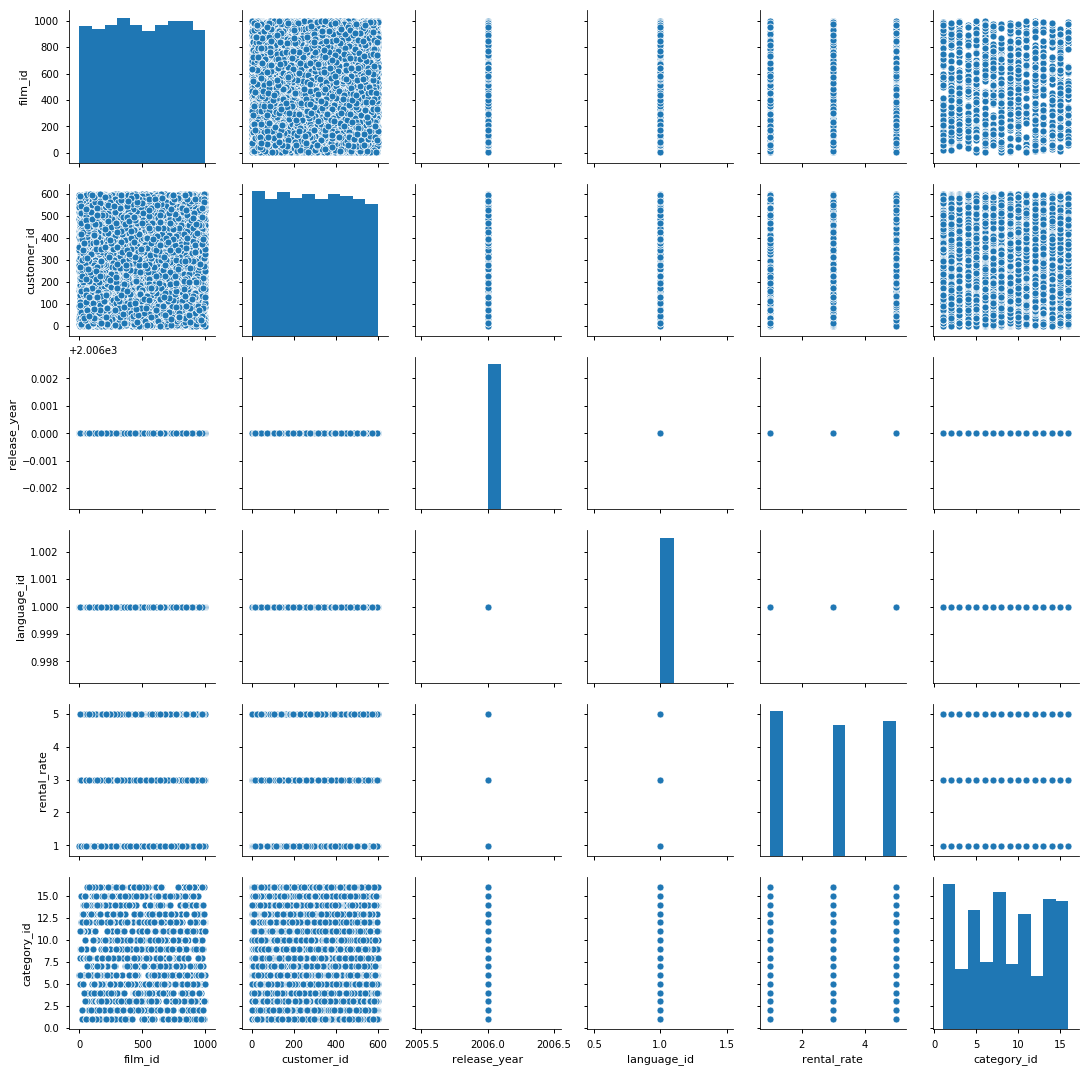

In [23]:
# YOUR CODE HERE
# use: 
import seaborn as sns

sns.pairplot(cluster_df)

#### <span style="color:blue"> Your justifications & commentary here: </span>

**

#### What do your resulting clusters represent?  Explain the distinguishing characteristics of each cluster. 
<span style= 'float: right;'><b>[2 marks]</b></span>

#### <span style="color:blue"> Your answer here: </span>

**

***

### Part 2 - Classification (30 Marks)

The rental company has decided that they want to use simple machine learning to allocate price tags to their movies. The tags are as follows:


|  **Classification**      |  **Requirements**        |
|--------------------------|------------------------- |
|  Cheap                   |  Rental Rate is 0.99   |
|  Moderate                |  Rental Rate is 2.99   |
|  Expensive               |  Rental Rate is 4.99  |


**Your task is to implement a `Classification Algorithm` (such as K-Nearest Neighbours) that can predict the `Price Label` of a movie**. You are required to perform the following tasks:

1. Create useable dataset/s by manually determining the 'truth values' for existing data (where the rating is within the classification system defined above)
2. Implement an algorithm that can predict the classification as per the above classifications.
3. Perform independent testing of the model and provide statistical metrics outlining the performance of your model. Splitting the dataset into testing and training subsets will assist with this.

You are welcome to use any features within the dataset, except the `Rental Rate` of the film. Various attributes relating to a movie in the tables `rating`, `movie`, `film_actor`, `actor` and `film_category` can be helpful while making the algorithm. If required, you can also look to make new **compound attributes** that may be helpful in increasing the accuracy of your model.
You are expected to justify all aspects of your answer including the features used, the metrics provided and validation system employed. Provide commentary on the strengths and potential pitfalls of the model.

<span style='color:red;'><b>Note:</b> You are only allowed to use packages that are within the Anaconda distribution. This means packages such as Keras, Tensorflow etc are not available for use.</span> 
<span style= 'float: right;'><b>[25 marks total: 18 marks model, 7 marks justification & commentary]</b></span>

In [ ]:
# YOUR CODE HERE




#### <span style="color:blue"> Your justifications & commentary here: </span>

**

#### Would you be able to get a better result, if you had used Clustering as a pre-processing step before Classfication? Justify your answer. 
<span style= 'float: right;'><b>[5 marks]</b></span>

#### <span style="color:blue"> Your answer here: </span>

**

***

## Section D - Decision Trees (10 Marks)

The following is a small synthetic data set about the weather conditions.  We are
going to try and use decision trees to predict whether it will rain or not on the given day.


|Temperature| Cloudy| UV Index| Humidity| Rain
|---:|--:|--:|--:|--:|
|25|No| Low| Low| No 
|29|No| Low| High| No
|26|No| Low| Medium| No
|26|No| Medium| Medium| No
|27|No| Medium| High| No
|28|No| High | High| No
|25|No| High |Low| No
|29|Yes| Low |Low| Yes
|28|No| Medium| High| Yes
|28|Yes| Medium| High| Yes
|26|No| Low |Low| Yes
|27|Yes| Low |High| Yes

**Note:**
* You can treat temperature as a continuous variable and split on a range of age values.
* Attribute selection in the tree uses information gain 

#### 1. What is the initial entropy of Cloudy?

<span style= 'float: right;'><b>[3 marks]</b></span>

<span style="color:blue">
    
#### YOUR ANSWER HERE
Entropy(cloudy)  
= Entropy(9, 3)  
= Entropy((9/12), (3/12))   
= -(9/12)log(9/12) + (3/12)log(3/12))  
= 0.8112781244591328   
</span>

#### 2. Which attribute would you choose to place at the root of a decision tree? Why?

<span style= 'float: right;'><b>[3 marks]</b></span>

<span style="color:blue">
    
#### YOUR ANSWER HERE
Cloudy, Because the relationship between Cloudy feature and Rain seems similar than other features.  

</span>

#### 3. Calculate and specify the information gain of the attribute you chose in the previous question.

<span style= 'float: right;'><b>[4 marks]</b></span>

<span style="color:blue">
    
#### YOUR ANSWER HERE
S : {No, No, No, No, No, No, No, Yes, Yes, Yes, Yes, Yes}  
→e(S) = -((7/12)log(7/12) + (5/12)log(5/12)) = 0.979868756651126   
  
[temperature]  
low(25,26) : 5times(4 No & 1 Yes)  
→e(T_low) = -((4/5)log(4/5) + (1/5)log(1/5)) = 0.7219280948873622  
medium(27) : 2times(1 No & 1 Yes)  
→e(T_medium) = -((1/2)log(1/2) + (1/2)log(1/2)) = 1  
high(28,29) : 5times(3 No & 2 Yes)  
→e(T_high) = -((3/5)log(3/5) + (2/5)log(2/5)) = 0.9709505944546686   
  
→(5/12) * e(T_low) + (2/12) * e(T_medium) + (5/12) * e(T_high) = 0.8720327872258461667  
→IG(S, Temperature) = e(S) - (5/12) * e(t_low) + (2/12) * e(t_medium) + (5/12) * e(t_high) = 0.1078359694252798333   

[cloudy]  
no : 9times(7 No & 2 Yes)  
→e(C_no) = -((7/9)log(7/9) + (2/9)log(2/9)) = 0.7642045065086203  
yes : 3times(0 No & 3 Yes)  
→e(C_yes) = -((0/3)log(0/3) + (3/3)log(3/3))=0   
  
→(9/12) * e(C_no) + (3/12) * e(C_yes) = 0.573153379881465225  
→IG(S, Cloudy) = e(S) - (9/12) * e(C_no) + (3/12) * e(C_yes) = 0.406715376769660775   
  
[UV Index]  
low : 6times(3 No & 3 Yes)  
→e(U_low) = -((3/6)log(3/6) + (3/6)log(3/6)) = 1  
medium : 4times(2 No & 2 Yes)  
→e(U_medium) = -((2/4)log(2/4) + (2/4)log(2/4)) = 1  
high : 2times(2 No & 0 Yes)  
→e(U_high) = -((2/2)log(2/2) + (0/2)log(0/2)) = 0   
  
→(6/12) * e(U_low) + (4/12) * e(U_medium) + (2/12) * e(U_high) = 0.8333333333333333  
→IG(S, UV Index) = e(S) - (6/12) * e(U_low) + (4/12) * e(U_medium) + (2/12) * e(U_high) = 0.1465354233177927   
  
[Humidity]  
low : 4times(2 No & 2 Yes)  
→e(H_low) = -((2/4)log(2/4) + (2/4)log(2/4)) = 1  
medium : 2times(2 No & 0 Yes)  
→e(H_medium) = -((2/2)log(2/2) + (0/2)log(0/2)) = 0  
high : 6times(3 No & 3 Yes)  
→e(H_high) = -((3/6)log(3/6) + (3/6)log(3/6)) = 1   
  
→(4/12) * e(H_low) + (2/12) * e(H_medium) + (6/12) * e(H_high) = 0.8333333333333333  
→IG(S, Humidity) = e(S) - (4/12) * e(H_low) + (2/12) * e(H_medium) + (6/12) * e(H_high) = 0.1465354233177927  

</span>